In [13]:
from mp3treesim.mp3treesim import similarity as mp3
from mp3treesim.mp3treesim import draw_tree as draw
from mp3treesim.mp3treesim import read_dotfile, draw_tree
import os
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
#import arff
import numpy as np
import tqdm

In [3]:
current_directory = os.getcwd()
#"Patient_ID","Tree_ID","Node_ID","Mutation_ID","Parent_ID"
df = pd.read_csv(current_directory[:-11] + "/Cancer data/brca_trees.csv", sep = ',')
tree_ids = df["Tree_ID"].unique()

In [ ]:
for tree_id in tree_ids:
    G = nx.DiGraph()
    curr_df = df[df["Tree_ID"] == tree_id]
    #f.write("#tree "+str(tree_id)+":  "+str(len(curr_df["Tree_ID"])-1)+"\n")
    nodes = set.union(set(curr_df["Parent_ID"]), set(curr_df["Node_ID"]))
    for node in nodes:
        G.add_node(str(node))
    for index, row in curr_df.iterrows():
        if row["Parent_ID"] == row["Node_ID"]:
            continue
        G.add_edge(str(row["Parent_ID"]), str(row["Node_ID"]))
    nx.nx_agraph.write_dot(G, current_directory[:-11] + "/Cancer data/trees/tree" + str(tree_id) + ".gv")

In [ ]:
tree_matrix = []


for i in range(len(tree_ids)):
    tree1 = read_dotfile(current_directory[:-11]+"/Cancer data/trees/tree" +str(i+1)+".gv")
    tree_matrix.append([])
    for j in range(len(tree_ids)):
        tree2 = read_dotfile(current_directory[:-11]+"/Cancer data/trees/tree" +str(j+1)+".gv")
        tree_matrix[i].append(mp3(tree1,tree2))

In [52]:
tree1 = read_dotfile(current_directory[:-11]+"/Cancer data/trees/tree1.gv")
tree3 = read_dotfile(current_directory[:-11]+"/Cancer data/trees/tree23.gv")

In [53]:
s = mp3(tree1,tree3)

ZeroDivisionError: float division by zero

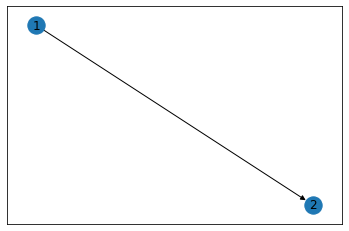

In [54]:
draw(tree3)

In [51]:
print(s)

0.5
